## Dataset Selection

I have chosen the dataset of "Birth by Mother's Country of Birth" within the UK and specifically the London Boroughs as it offers valuable insight into London's demographic make-up. By comparing the birth trends of London Borough's to the rest of the UK throughout the years we can also see the impacts of the UK's globalisation since 2001.

London is one of the world's most diverse cities, often described as a 'melting-pot' of culture. The data surrounding the countries of newborn's mothers country of birth allows us to provide numerical insights and contextualise migration patterns, settlement trends and how international relations has affected immigration patterns across London and the other regions within the UK.

The importance of this analysis lies in a number of factors. Firstly, we can analyse the patterns of diversity within the different London Boroughs over the years, observing these trends can help uncover demographic shifts. 

## Data Preparation & Exploration

### Data Cleaning

To begin my data cleaning, I have imported both Pandas and NumPy into my notebook. I have then set the file path and loaded in my dataset.

In [11]:
# Importing Pandas & NumPy Libraries for future use
import pandas as pd
import numpy as np

In [18]:
# Uploading CSV
file_path = '/Users/callumhall/Documents/birth data.csv'
raw_data = pd.read_csv(file_path)

Before I begin cleaning, I would like to have an overview of my dataset. Therefore, I have used the `head()` function in order to view the first few rows to gain an insight into its format. I have then used the `info()` and `shape` functions in order to get an idea of the datatypes used in the columns, the number of rows and columns I will be working with.

In [173]:
raw_data.head()

,year,gss_code,usual_residence_of_mother,type,total_births_all,total_births_uk_mothers,total_births_overseas_mothers,overseas_mothers_total_EU,overseas_mothers_pre2004_EU_countries,overseas_mothers_post2004_EU_accession_countries,overseas_mothers_non_EU_europe,overseas_mothers_asia,overseas_mothers_africa,overseas_mothers_rest_of_world
0,2001,E92000001,ENGLAND,Country,563744,467536,96208,17632,14388,3244,5228,39147,20558,13643
1,2001,W92000004,WALES,Country,30616,29022,1594,430,380,50,58,682,246,178
2,2001,E12000001,NORTH EAST,Region,25949,24429,1520,324,284,40,72,768,231,125
3,2001,E12000002,NORTH WEST,Region,75201,67632,7569,1136,989,147,199,4743,936,555
4,2001,E12000003,YORKSHIRE AND THE HUMBER,Region,55625,49071,6554,860,733,127,173,4611,484,426


In [176]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   year                                              989 non-null    int64 
 1   gss_code                                          989 non-null    object
 2   usual_residence_of_mother                         989 non-null    object
 3   type                                              989 non-null    object
 4   total_births_all                                  989 non-null    int64 
 5   total_births_uk_mothers                           989 non-null    int64 
 6   total_births_overseas_mothers                     989 non-null    int64 
 7   overseas_mothers_total_EU                         989 non-null    int64 
 8   overseas_mothers_pre2004_EU_countries             989 non-null    int64 
 9   overseas_mothers_post2004_EU_acc

In [178]:
raw_data.shape

(989, 14)

From here, I have checked for any null values in the dataset using the `isnull()` and `sum()` functions. I have then checked where the null values are in the dataset. I can see for both the `gss_code` and `type` columns, the null values fall on the same row.

In [20]:
raw_data.isnull().sum()

year                                                0
gss_code                                            6
usual_residence_of_mother                           0
type                                                6
total_births_all                                    0
total_births_uk_mothers                             0
total_births_overseas_mothers                       0
overseas_mothers_total_EU                           0
overseas_mothers_pre2004_EU_countries               0
overseas_mothers_post2004_EU_accession_countries    0
overseas_mothers_non_EU_europe                      0
overseas_mothers_asia                               0
overseas_mothers_africa                             0
overseas_mothers_rest_of_world                      0
dtype: int64

In [22]:
raw_data[raw_data['gss_code'].isna()==1]

,year,gss_code,usual_residence_of_mother,type,total_births_all,total_births_uk_mothers,total_births_overseas_mothers,overseas_mothers_total_EU,overseas_mothers_pre2004_EU_countries,overseas_mothers_post2004_EU_accession_countries,overseas_mothers_non_EU_europe,overseas_mothers_asia,overseas_mothers_africa,overseas_mothers_rest_of_world
644,2015,NaN,EAST,NaN,72505,54739,17764,8198,2092,6106,882,4618,2522,1544
773,2018,NaN,EAST,NaN,68881,51267,17609,8415,1930,6485,1033,4381,2329,1451
816,2019,NaN,EAST,NaN,67409,49739,17668,8332,2020,6312,1118,4454,2296,1468
859,2020,NaN,EAST,NaN,64313,46804,17506,8025,1921,6104,1244,4610,2235,1392
902,2021,NaN,EAST,NaN,67054,49248,17800,8094,2083,6011,1317,4656,2241,1492
945,2022,NaN,EAST,NaN,64294,46159,18127,7425,1941,5484,1363,5240,2604,1495


After inspection of the dataset, I can see the issue is that the `usual_residence_of_mother` for 'EAST OF ENGLAND' has changed to 'EAST' halfway through which may have caused issues when generating the missing values. Therefore, I have filled these null values with those of 'EAST OF ENGLAND'. 

In [25]:
# Fill in missing gss_code and type with that of 'East of England'
raw_data['gss_code'] = raw_data['gss_code'].fillna('E12000006')
raw_data['type'] = raw_data['type'].fillna('Region')

I have then checked again to see if there is any more null values. Which there are not so this part of my cleaning is complete.

In [29]:
raw_data.isnull().sum()

year                                                0
gss_code                                            0
usual_residence_of_mother                           0
type                                                0
total_births_all                                    0
total_births_uk_mothers                             0
total_births_overseas_mothers                       0
overseas_mothers_total_EU                           0
overseas_mothers_pre2004_EU_countries               0
overseas_mothers_post2004_EU_accession_countries    0
overseas_mothers_non_EU_europe                      0
overseas_mothers_asia                               0
overseas_mothers_africa                             0
overseas_mothers_rest_of_world                      0
dtype: int64

Following on from this, I felt for continuity I should replace those rows with 'EAST' with 'EAST OF ENGLAND' using the `replace()` function. I have then checked the rows of the dataset to see that this has been done by printing the `unique()` rows. I have also checked to see if there is any duplicated rows by using the `sum()` function on the `duplicated()` function. Since there are not any duplicated rows, I am happy to move on to the next part of my cleaning.

In [32]:
raw_data['usual_residence_of_mother'] = raw_data['usual_residence_of_mother'].replace('EAST', 'EAST OF ENGLAND')
print(raw_data['usual_residence_of_mother'].unique())

['ENGLAND' 'WALES' 'NORTH EAST' 'NORTH WEST' 'YORKSHIRE AND THE HUMBER'
 'EAST MIDLANDS' 'WEST MIDLANDS' 'EAST OF ENGLAND' 'LONDON' 'SOUTH EAST'
 'SOUTH WEST' 'Camden' 'Hammersmith and Fulham' 'Haringey' 'Islington'
 'Kensington and Chelsea' 'Lambeth' 'Lewisham' 'Newham' 'Southwark'
 'Tower Hamlets' 'Wandsworth' 'Westminster' 'Barking and Dagenham'
 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Croydon' 'Ealing' 'Enfield'
 'Greenwich' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow'
 'Kingston upon Thames' 'Merton' 'Redbridge' 'Richmond upon Thames'
 'Sutton' 'Waltham Forest' 'Hackney and City of London']


In [34]:
raw_data.duplicated().sum()

0

I have decided to drop 3 columns as they are not particularly relevant to my analysis. These being 'GSS_Code', 'Pre_2004_EU_Mothers' and 'Post_2004_EU_Mothers'. I will be using the 'overseas_mothers_total_EU' column for those born who's mother was born in the EU and I will be using the 'usual_residence_of_mother' in order to describe the area of which the mother lives.

In [40]:
birth_data = raw_data.drop(columns = ['gss_code', 'overseas_mothers_pre2004_EU_countries', 'overseas_mothers_post2004_EU_accession_countries'])

I then decided to rename all the columns for ease of reading and to reduce the width of the dataset to make reading it on JNB easier. I did this using the `rename()` function. I also ensured all values in the 'Residence' column are formatted in upper case for continuity by using the `str.upper()` function. I have then checked the columns name changes again with the `head()` function.

In [43]:
birth_data.rename(columns={
    'year' : 'Year',
    'usual_residence_of_mother' : 'Residence',
    'type' : 'Type',
    'total_births_all': 'Total_Births',
    'total_births_uk_mothers' : 'UK_Mothers',
    'total_births_overseas_mothers' : 'Overseas_Mothers',
    'overseas_mothers_total_EU' : 'EU_Mothers',
    'overseas_mothers_non_EU_europe' : 'Non_EU_European_Mothers',
    'overseas_mothers_asia' : 'Asia_Mothers',
    'overseas_mothers_africa' : 'Africa_Mothers',
    'overseas_mothers_rest_of_world' : 'ROW_Mothers'
}, inplace=True)

birth_data['Residence'] = birth_data['Residence'].str.upper()

In [184]:
birth_data.head()

,Year,Residence,Type,Total_Births,UK_Mothers,Overseas_Mothers,EU_Mothers,Non_EU_European_Mothers,Asia_Mothers,Africa_Mothers,ROW_Mothers
0,2001,ENGLAND,Country,563744,467536,96208,17632,5228,39147,20558,13643
1,2001,WALES,Country,30616,29022,1594,430,58,682,246,178
2,2001,NORTH EAST,Region,25949,24429,1520,324,72,768,231,125
3,2001,NORTH WEST,Region,75201,67632,7569,1136,199,4743,936,555
4,2001,YORKSHIRE AND THE HUMBER,Region,55625,49071,6554,860,173,4611,484,426


I am currently happy with the look of my DataFrame, I feel there is not any further need to clean or transform it any further and I will now go on to begin my analysis.

### Explanatory Data Analysis (EDA)

In the first step of my explanatory data analysis, I have checked how the data is formatted in the dataset using the `head()` function. In addition to this, I have checked the information of the values and their data types using the `info()` function. I had done this previously, however since I have now made changes to my DataFrame I would like to check over them again.

In [187]:
print(birth_data.head())
print(birth_data.info())
print(birth_data.tail)

   Year                 Residence     Type  Total_Births  UK_Mothers  \
0  2001                   ENGLAND  Country        563744      467536   
1  2001                     WALES  Country         30616       29022   
2  2001                NORTH EAST   Region         25949       24429   
3  2001                NORTH WEST   Region         75201       67632   
4  2001  YORKSHIRE AND THE HUMBER   Region         55625       49071   

   Overseas_Mothers  EU_Mothers  Non_EU_European_Mothers  Asia_Mothers  \
0             96208       17632                     5228         39147   
1              1594         430                       58           682   
2              1520         324                       72           768   
3              7569        1136                      199          4743   
4              6554         860                      173          4611   

   Africa_Mothers  ROW_Mothers  
0           20558        13643  
1             246          178  
2             231      

In [57]:
birth_data.shape

(989, 11)

### Understanding and Visualising the Total Births and Overseas Mothers in London and England

I chose this explanatory data analysis to explore how birth trends in London and England have evolved between 2001 and 2023. Analyzing year-on-year birth rates helps to highlight how societal, economic, and policy changes may have influenced population growth. By focusing on births to overseas mothers, I sought to uncover trends in diversity, reflecting the role of migration in shaping communities. London, as a global city, serves as a focal point for understanding these shifts, while comparing it to England as a whole provides context and contrast.

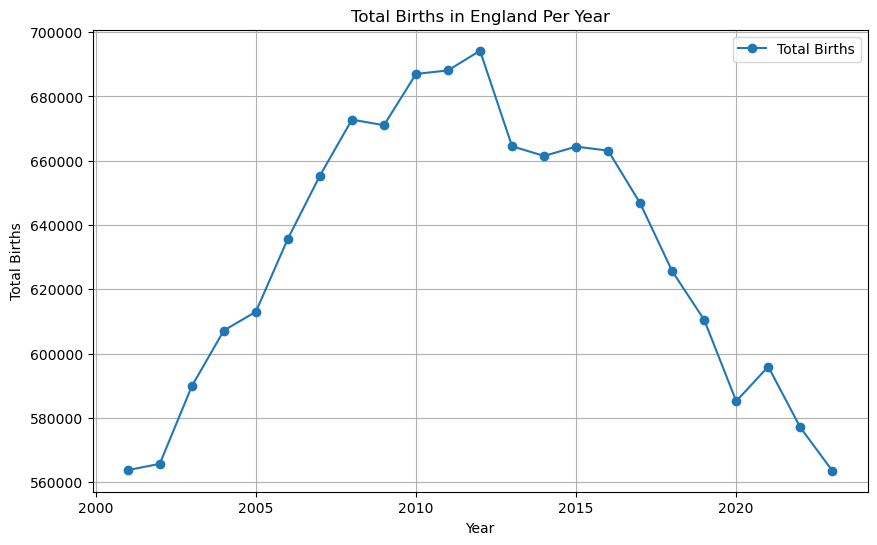

In [190]:
# Importing the MatPlotLib Library in order to visualise my data
import matplotlib.pyplot as plt

# Filtering the dataset for rows where the Mother's 'Residence' is 'England'
nationwide_data = birth_data[birth_data['Residence'] == 'ENGLAND']

# Group by 'year' and get the value of 'Total_Births' for England
total_births_per_year = nationwide_data.groupby('Year')['Total_Births'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_births_per_year.index, total_births_per_year.values, marker='o', linestyle='-', label='Total Births')
plt.title('Total Births in England Per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.grid(True)
plt.legend()
plt.show()

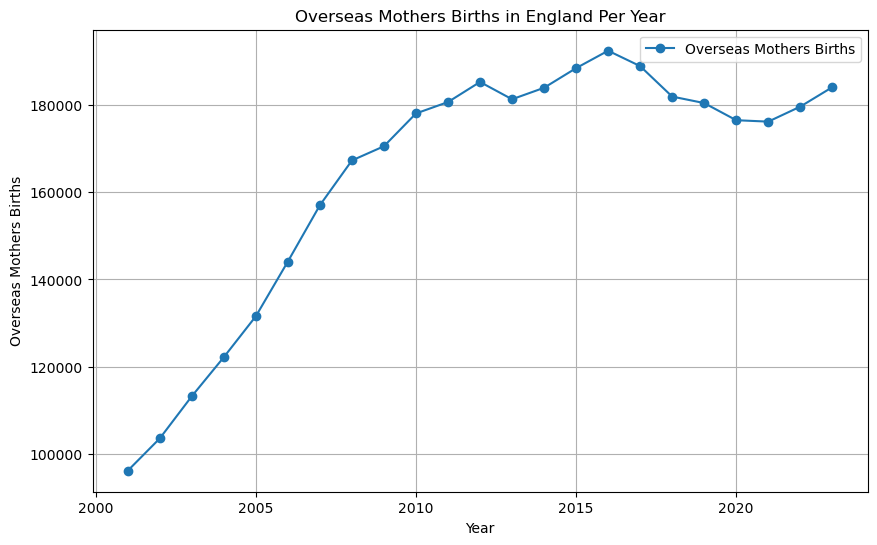

In [65]:
# Group by 'Year' and get the value of 'Overseas_Mothers' for England
overseas_births_per_year = nationwide_data.groupby('Year')['Overseas_Mothers'].sum()

plt.figure(figsize=(10, 6))
plt.plot(overseas_births_per_year.index, overseas_births_per_year.values, marker='o', linestyle='-', label='Overseas Mothers Births')
plt.title('Overseas Mothers Births in England Per Year')
plt.xlabel('Year')
plt.ylabel('Overseas Mothers Births')
plt.grid(True)
plt.legend()
plt.show()

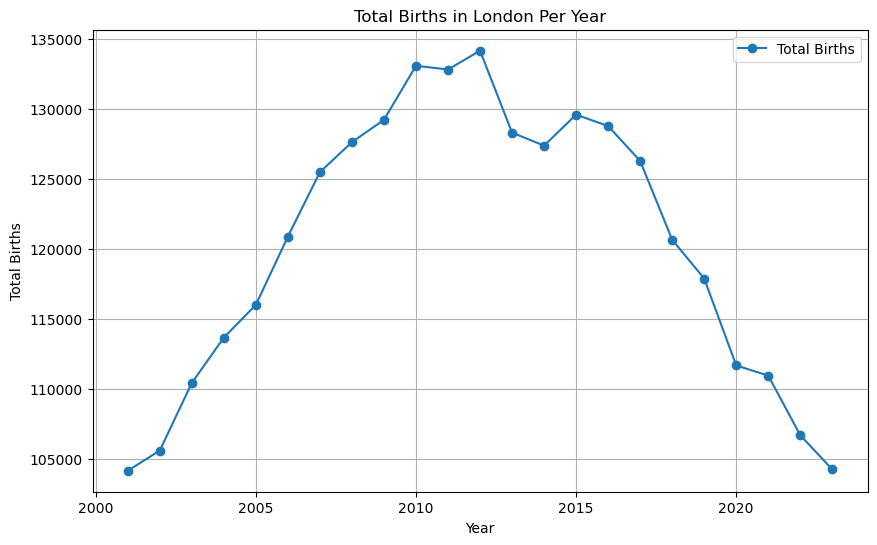

In [71]:
london_data = birth_data[birth_data['Residence'] == 'LONDON']

# Group by 'year' and get the value of 'Total_Births' for England
london_births_per_year = london_data.groupby('Year')['Total_Births'].sum()

plt.figure(figsize=(10, 6))
plt.plot(london_births_per_year.index, london_births_per_year.values, marker='o', linestyle='-', label='Total Births')
plt.title('Total Births in London Per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.grid(True)
plt.legend()
plt.show()

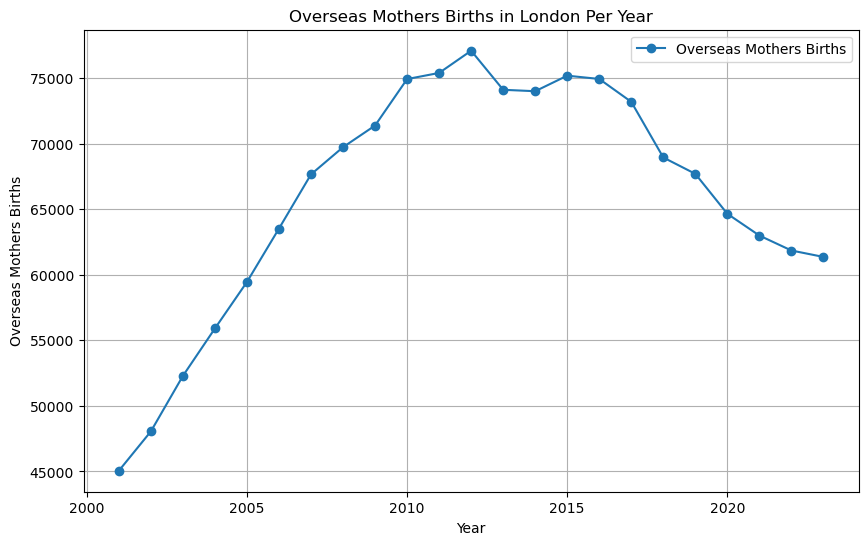

In [73]:
# Group by 'Year' and get the value of 'Overseas_Mothers' for England
ldn_overseas_births_per_year = london_data.groupby('Year')['Overseas_Mothers'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ldn_overseas_births_per_year.index, ldn_overseas_births_per_year.values, marker='o', linestyle='-', label='Overseas Mothers Births')
plt.title('Overseas Mothers Births in London Per Year')
plt.xlabel('Year')
plt.ylabel('Overseas Mothers Births')
plt.grid(True)
plt.legend()
plt.show()

We can see that the trends across London and the whole of England are both very similar in Total Births. As are the trends of Mothers from Overseas countries until the 2015s where they stay at similar levels across England whilst the London overseas mother rates fall in line with Birth Rates in London. This could suggest that there was potential migration from immigrant mothers across England within this period causing these rates to steadily increase.

#### Finding Further Information Surrounding Total Births Nationwide and in London

To investigate the total births of London and England, I wanted to investigate the dataset by generating the yearly aggregations of each. To do so, I used the `mean()`, `std()`, `max()` and `min()` functions on both London and Nationwide data. This will help me understand the yearly layout of the dataset and also London's importance in the nation's birth trends.

In [103]:
mean_nationwide_births = nationwide_data['Total_Births'].mean()
std_nationwide_births = nationwide_data['Total_Births'].std()
max_nationwide_births = nationwide_data['Total_Births'].max()
min_nationwide_births = nationwide_data['Total_Births'].min()

mean_london_births = london_data['Total_Births'].mean()
std_london_births = london_data['Total_Births'].std()
max_london_births = london_data['Total_Births'].max()
min_london_births = london_data['Total_Births'].min()


print(f"The Average Yearly Nationwide Births are: {mean_nationwide_births}")
print(f"The Standard Deviation of Nationwide Births Yearly are: {std_nationwide_births}")
print(f"The Maximum Yearly Births across England is {max_nationwide_births} and the Minimum is {min_nationwide_births}")
print(f"The Average Yearly Births in London are: {mean_london_births}")
print(f"The Standard Deviation of London Births Yearly are: {std_london_births}")
print(f"The Maximum Yearly Births in London is {max_london_births} and the Minimum is {min_london_births}")

The Average Yearly Nationwide Births are: 630527.1739130435
The Standard Deviation of Nationwide Births Yearly are: 43389.76858101267
The Maximum Yearly Births across England is 694241 and the Minimum is 563561
The Average Yearly Births in London are: 120259.26086956522
The Standard Deviation of London Births Yearly are: 10071.541180327646
The Maximum Yearly Births in London is 134186 and the Minimum is 104162


From the information above, we can see that the standard deviation of total births across England (43,390) is low in comparison to the mean of 630,527. This suggests that the birth rates within England are relatively consistent over the years within the dataset. Meanwhile, London's standard deviation for births (10,072) is also low in comparison to the average yearly births in the city (120,259). In addition to this, we can see London's average births make up around 20% of the nation's suggesting the city's importance to birth rates.

I also would like to look into the lower, upper and interquartile ranges of the total births in London and England over the period. This is for future reference where I can see which London Borough's fit into this range.

In [122]:
nation_yearly_totals = nationwide_data.groupby('Year')['Total_Births'].sum()

nation_q1 = np.percentile(nation_yearly_totals, 25)
nation_q3 = np.percentile(nation_yearly_totals, 75)

nation_iqr = nation_q3 - nation_q1

print(f"Lower Quartile of Nationwide Births: {nation_q1}")
print(f"Upper Quartile of Nationwide Births: {nation_q3}")
print(f"Inter-Quartile Range of Nationwide Births: {nation_iqr}")

Lower Quartile of Nationwide Births: 592899.5
Upper Quartile of Nationwide Births: 664458.0
Inter-Quartile Range of Nationwide Births: 71558.5


In [124]:
london_yearly_totals = london_data.groupby('Year')['Total_Births'].sum()

london_q1 = np.percentile(london_yearly_totals, 25)
london_q3 = np.percentile(london_yearly_totals, 75)

london_iqr = london_q3 - london_q1

print(f"Lower Quartile of London Births: {london_q1}")
print(f"Upper Quartile of London Births: {london_q3}")
print(f"Inter-Quartile Range of London Births: {london_iqr}")

Lower Quartile of London Births: 111324.5
Upper Quartile of London Births: 128567.5
Inter-Quartile Range of London Births: 17243.0


#### Yearly Growth Rates of Total Births in England and London

Adding the growth rates of total births within England and London allows us to detect the trends of the country and its capital city over the years. From this, we can draw comparisons between London and England as a whole to see if living in an urban 'supercity' hinders or promotes birth rates.

In [118]:
nation_yearly_total_growth = nation_yearly_totals.pct_change() * 100
nation_yearly_total_growth.fillna(0, inplace=True)
print(nation_yearly_total_growth)

Year
2001    0.000000
2002    0.348562
2003    4.267565
2004    2.938539
2005    0.962476
2006    3.706193
2007    3.084398
2008    2.662976
2009   -0.260252
2010    2.376695
2011    0.162007
2012    0.889525
2013   -4.281510
2014   -0.454616
2015    0.438854
2016   -0.186936
2017   -2.467440
2018   -3.268892
2019   -2.420838
2020   -4.145748
2021    1.837507
2022   -3.171753
2023   -2.336902
Name: Total_Births, dtype: float64


In [120]:
london_yearly_growth = london_yearly_totals.pct_change() * 100
london_yearly_growth.fillna(0, inplace = True)
print(london_yearly_growth)

Year
2001    0.000000
2002    1.383422
2003    4.577521
2004    2.935610
2005    2.058428
2006    4.205346
2007    3.810650
2008    1.709892
2009    1.248717
2010    2.991218
2011   -0.201336
2012    1.010968
2013   -4.362601
2014   -0.727021
2015    1.739417
2016   -0.626471
2017   -1.937067
2018   -4.461317
2019   -2.300432
2020   -5.266461
2021   -0.650920
2022   -3.843693
2023   -2.290620
Name: Total_Births, dtype: float64


We are able to see that the growth rates of total births in England and London follow a similar pattern. Therefore, they may be correlated - this could be down to London's vast population and its impact on the nationwide population. Alternatively, there could be no external factors which were affecting London individually over this period.

#### Comparison of Births of Infants from Overseas and UK Mothers in London and England

To continue my comparison of London and the UK, I have decided to compare the percentage of births to Mothers from Overseas to see the demographic differences between the two. This is because London is known as the most diverse city in the UK, therefore should have a higher percentage of these births to Mothers from overseas than the rest of the country.

I then wanted to plot this onto a bar chart in order to give a visual comparison of how many infants were born to Mothers from overseas and Mothers from the UK. This would allow us to easily compare the demographic make-up of London in relation to the rest of the country.

In [207]:
# Calculate percentage of overseas births out of total births for England year-on-year
nation_yearly = nationwide_data.groupby('Year').agg({
    'Total_Births': 'sum',
    'Overseas_Mothers': 'sum'
}).reset_index()

# Add in Additional Column of 'Percentage_Overseas_Births'
nation_yearly['percentage_overseas_births'] = (nation_yearly['Overseas_Mothers'] / nation_yearly['Total_Births']) * 100

# Printing the Results for England
print("\nEngland Year-on-Year Percentage of Overseas Births")
print(nation_yearly)

# Doing the Same for London
london_yearly = london_data.groupby('Year').agg({
    'Total_Births': 'sum',
    'Overseas_Mothers': 'sum'
}).reset_index()

london_yearly['percentage_overseas_births'] = (london_yearly['Overseas_Mothers'] / london_yearly['Total_Births']) * 100

print("\nLondon Year-on-Year Percentage of Overseas Births")
print(london_yearly)


England Year-on-Year Percentage of Overseas Births
    Year  Total_Births  Overseas_Mothers  percentage_overseas_births
0   2001        563744             96208                   17.065902
1   2002        565709            103606                   18.314363
2   2003        589851            113259                   19.201290
3   2004        607184            122202                   20.126024
4   2005        613028            131575                   21.463131
5   2006        635748            144102                   22.666528
6   2007        655357            156990                   23.954883
7   2008        672809            167236                   24.856386
8   2009        671058            170488                   25.405852
9   2010        687007            177995                   25.908761
10  2011        688120            180605                   26.246149
11  2012        694241            185203                   26.677047
12  2013        664517            181244           

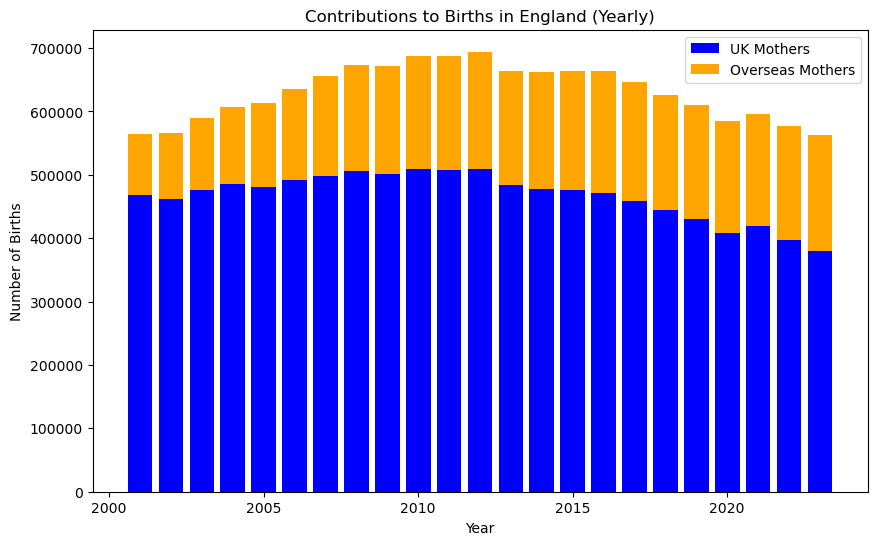

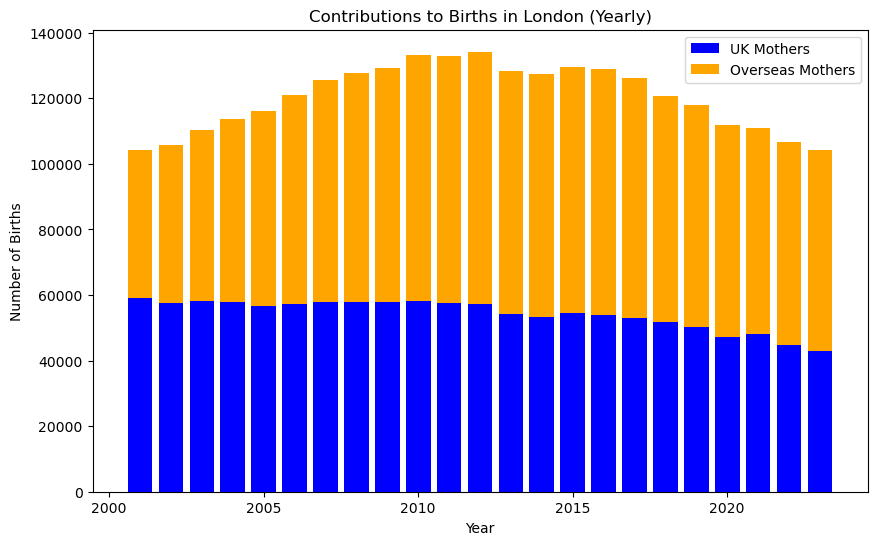

In [209]:
nation_yearly = nationwide_data.groupby('Year').agg({
    'Total_Births': 'sum',
    'Overseas_Mothers': 'sum',
    'UK_Mothers': 'sum' # I have added in UK Mothers for this comparison
}).reset_index()

# Plotting England's data
plt.figure(figsize=(10, 6))
plt.bar(nation_yearly['Year'], nation_yearly['UK_Mothers'], label='UK Mothers', color='blue')
plt.bar(nation_yearly['Year'], nation_yearly['Overseas_Mothers'], bottom=nation_yearly['UK_Mothers'], label='Overseas Mothers', color='orange')
plt.title('Contributions to Births in England (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

london_yearly = london_data.groupby('Year').agg({
    'Total_Births': 'sum',
    'Overseas_Mothers': 'sum',
    'UK_Mothers': 'sum' # Same for London
}).reset_index()

# London Data
plt.figure(figsize=(10, 6))
plt.bar(london_yearly['Year'], london_yearly['UK_Mothers'], label='UK Mothers', color='blue')
plt.bar(london_yearly['Year'], london_yearly['Overseas_Mothers'], bottom=london_yearly['UK_Mothers'], label='Overseas Mothers', color='orange')
plt.title('Contributions to Births in London (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

#### Comparing and Summarising the London Boroughs Year-on-Year

I produced a list of the London Boroughs in order to refer back to when trying to summarise the birth trends across the 32 boroughs of London. From here I was able to define a variable of 'borough_data' in order to produce a summary of the boroughs who had the highest and lowest birth rates in total and to mothers from overseas and the UK for each year. This can give us an insight into the most diverse London Boroughs, who have had the highest birth rates and identify the trends between these variables. Obviously, a limiting factor of this would be population which is not available within the original dataset, as the Borough's with the highest populations are likely to have higher birth rates.

In [136]:
london_boroughs = [
    "CITY OF LONDON", "BARKING AND DAGENHAM", "BARNET", "BEXLEY", "BRENT", "BROMLEY", "CAMDEN", "CROYDON", "EALING", "ENFIELD",
    "GREENWICH", "HACKNEY", "HAMMERSMITH AND FULHAM", "HARINGEY", "HARROW", "HAVERING", "HILLINGDON", "HOUNSLOW", "ISLINGTON", 
    "KENSINGTON AND CHELSEA", "KINGSTON UPON THAMES", "LAMBETH", "LEWISHAM", "MERTON", "NEWHAM", "REDBRIDGE", "RICHMOND UPON THAMES",
    "SOUTHWARK", "SUTTON", "TOWER HAMLETS", "WALTHAM FOREST", "WANDSWORTH", "WESTMINSTER"
]

In [215]:
def borough_data(data, borough_list, year_column, total_births_col, overseas_births_col, uk_births_col, residence_col):
    # Filtering the data in order to only include the London Boroughs
    filtered_data = data[data[residence_col].isin(borough_list)]

    # Find the borough with the highest and lowest total births, births to mothers from overseas and the UK for each year
    highest_total_births = filtered_data.loc[filtered_data.groupby(year_column)[total_births_col].idxmax()]
    highest_overseas_births = filtered_data.loc[filtered_data.groupby(year_column)[overseas_births_col].idxmax()]
    highest_uk_births = filtered_data.loc[filtered_data.groupby(year_column)[uk_births_col].idxmax()]
    lowest_total_births = filtered_data.loc[filtered_data.groupby(year_column)[total_births_col].idxmin()]
    lowest_overseas_births = filtered_data.loc[filtered_data.groupby(year_column)[overseas_births_col].idxmin()]
    lowest_uk_births = filtered_data.loc[filtered_data.groupby(year_column)[uk_births_col].idxmin()]

    # Combine the results into a summary DataFrame
    summary = pd.DataFrame({
        'Year': highest_total_births[year_column].values,
        'Borough with Highest Total Births': highest_total_births[residence_col].values,
        'Highest Total Births': highest_total_births[total_births_col].values,
        'Borough with Highest Overseas Mothers': highest_overseas_births[residence_col].values,
        'Highest Overseas Mothers': highest_overseas_births[overseas_births_col].values,
        'Borough with Highest UK Mothers': highest_uk_births[residence_col].values,
        'Highest UK Mothers': highest_uk_births[uk_births_col].values,
        'Borough with Lowest Total Births': lowest_total_births[residence_col].values,
        'Lowest Total Births': lowest_total_births[total_births_col].values,
        'Borough with Lowest Overseas Mothers': lowest_overseas_births[residence_col].values,
        'Lowest Overseas Mothers': lowest_overseas_births[overseas_births_col].values,
        'Borough with Lowest UK Mothers': lowest_uk_births[residence_col].values,
        'Lowest UK Mothers': lowest_uk_births[uk_births_col].values
    })

    return summary

In [217]:
# Calling the function in relation to 'birth_data
summary = borough_data(
    data=birth_data,
    borough_list=london_boroughs,
    year_column='Year',
    total_births_col='Total_Births',
    overseas_births_col='Overseas_Mothers',
    uk_births_col='UK_Mothers',
    residence_col='Residence'
)

# Display the summary
print(summary)

    Year Borough with Highest Total Births  Highest Total Births  \
0   2001                            NEWHAM                  4805   
1   2002                            NEWHAM                  4938   
2   2003                            NEWHAM                  5102   
3   2004                            NEWHAM                  5170   
4   2005                            NEWHAM                  5353   
5   2006                            NEWHAM                  5523   
6   2007                            NEWHAM                  6053   
7   2008                            NEWHAM                  5963   
8   2009                            NEWHAM                  6003   
9   2010                            NEWHAM                  6262   
10  2011                            NEWHAM                  6335   
11  2012                            NEWHAM                  6426   
12  2013                            NEWHAM                  6267   
13  2014                            NEWHAM      

We are able to see that the borough of Newham has both the highest total birth rates for each year and the highest number of infants born to Mothers from Overseas. Newham is known to be the most diverse borough in London with 7 out of 10 residents from ethnically diverse background (BITC, 2023), therefore this is in line with the dataset. Meanwhile, it seems the outer Southern Boroughs of Bromley & Croydon (previously in Kent and Surrey respectively) have the highest number of infants born to Mothers from the UK.

In terms of lowest total births, Kingston-Upon-Thames had the lowest from 2001 to 2007 and then Kensington & Chelsea took over from them between 2008 and 2023. Kensington & Chelsea had the lowest number of infants born to Mothers from the UK each year, whilst Havering, Kingston-Upon-Thames and Richmond-Upon-Thames have the lowest number of infants born to Mothers from Overseas. This reflects my hypothesis that the outer boroughs, previously in counties such as Essex, Surrey and Kent tend to have a less diverse make-up of their populations in comparison to the inner London boroughs.

#### The Impact of Brexit

Another factor I would like to assess is the impact of Brexit on the births to Mothers from EU countries following its implementation in 2020. This is an interesting analysis as the UK's decision to leave the EU ended the 'free movement' of labour between the UK and the EU, therefore likely reducing immigration to the country from current EU members. This is likely to reduce the number of births in comparison to previous years to infants born from Mothers from EU Countries.

In [227]:
# Group data by year and calculate the sum of total births and EU mothers' births
yearly_eu_births = birth_data.groupby('Year').agg({
    'Total_Births': 'sum',
    'EU_Mothers': 'sum'
}).reset_index()

# Calculate the percentage of births to EU mothers year-on-year
yearly_eu_births['percentage_eu_births'] = (
    yearly_eu_births['EU_Mothers'] / yearly_eu_births['Total_Births']
) * 100

# Display the resulting DataFrame
print(yearly_eu_births)

    Year  Total_Births  EU_Mothers  percentage_eu_births
0   2001       1262266       42671              3.380508
1   2002       1267226       44499              3.511528
2   2003       1321539       48031              3.634475
3   2004       1360372       51888              3.814251
4   2005       1374668       59014              4.292964
5   2006       1426022       71059              4.983023
6   2007       1470633       87001              5.915888
7   2008       1508919      100313              6.648004
8   2009       1506298      108794              7.222608
9   2010       1543077      121978              7.904855
10  2011       1544681      127084              8.227200
11  2012       1557906      135912              8.724018
12  2013       1491113      138935              9.317537
13  2014       1483935      146881              9.898075
14  2015       1491692      158665             10.636579
15  2016       1488053      164155             11.031529
16  2017       1452072      163

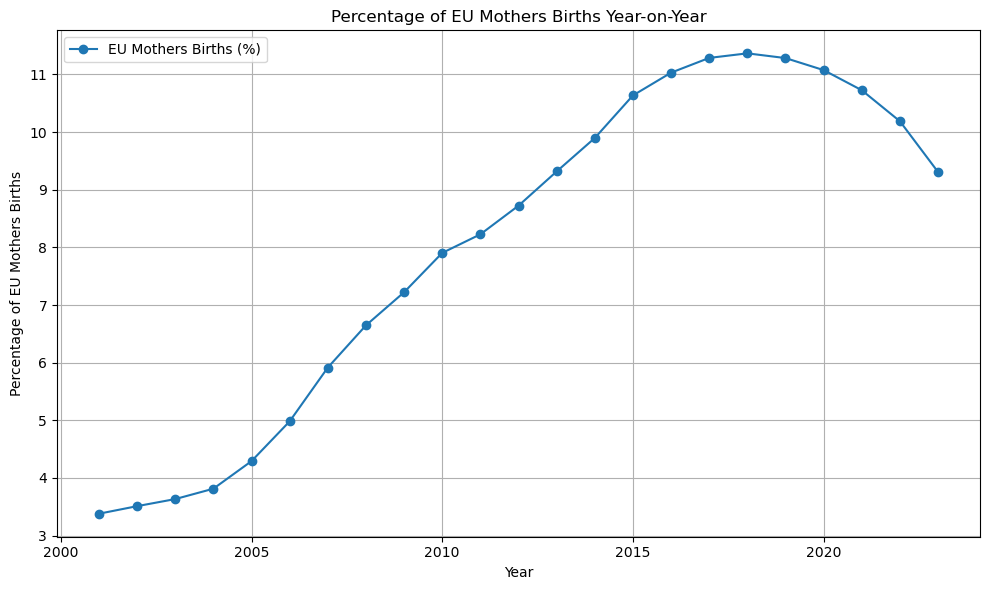

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_eu_births['Year'], yearly_eu_births['percentage_eu_births'], marker='o', label='EU Mothers Births (%)')
plt.title('Percentage of EU Mothers Births Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Percentage of EU Mothers Births')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

As we can see, there is a clear dip following the implementation of Brexit on the EU. From the diagram displayed, we can see that the percentage of infants born to Mothers from the EU to total births drops after 2020, when Brexit was implemented by the UK Government.